In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance as d

In [2]:
# x = pd.Series(np.random.randn(10)).T
# y = pd.Series(np.random.randn(10)).T

x = [1, 4, 6]
y = [0, 2, 1, 0]

In [9]:
from dtwParallel import dtw_functions 

dtw_functions.dtw(x, y, local_dissimilarity="square_euclidean_distance")

47.0

In [4]:
from fastdtw import fastdtw

d, _ = fastdtw(x, y, dist=d.euclidean)
d

11.0

In [5]:
from dtaidistance import dtw_ndim

dtw_ndim.distance(x, y)

numpy.ndarray size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject


6.855654600401044

In [6]:
from tslearn.metrics import dtw

dtw(x, y)

6.855654600401044

In [7]:
from pyts.metrics import dtw

dtw(x, y)

6.855654600401044

## Compare time with differents number of MTS

### Code to generate synthetic data.  

In [87]:
import numpy as np

number_of_MTS = [49, 99, 249, 499, 999, 1999]

for n in range(len(number_of_MTS)):
    X = np.random.randint(0, 100, size = (20,6))
    X = X.reshape(1, 20, 6)

    for i in range(number_of_MTS[n]):
        X_aux = np.random.randint(0, 50, size = (20,6))
        X_aux = X_aux.reshape(1, 20, 6)
        X = np.append(X, X_aux, axis=0)

    
    np.save(
       "./Results_with_differents_Number_of_MTS/SyntheticData/dataWith"+str(number_of_MTS[n]+1)+"MTS.npy", X
    )
    print(X.shape)

(10, 20, 6)


### Experiments

In [ ]:
import time
from dtwParallel import dtw_functions
import numpy as np
from scipy.spatial import distance as d

class Input:
    def __init__(self):
        self.check_errors = False 
        self.type_dtw = "d"
        self.MTS = True
        self.regular_flag = 0
        self.n_threads = -1
        self.local_dissimilarity = "local_square_distance"
        self.visualization = False
        self.output_file = False
        self.DTW_to_kernel = False
        self.sigma = 1
        self.itakura_max_slope = None
        self.sakoe_chiba_radius = None
        
        
test = [50, 100, 250, 500, 1000, 2000]

#n_threads = [4, 8, 16, 32, 64, 128]
n_threads = [8, 16, 32, 64, 128]

for t in range(len(test)):
    
    x = np.load('./Results_with_differents_Number_of_MTS/SyntheticData/dataWith'+str(test[t])+'MTS.npy', allow_pickle=True)

    y = x.copy()

    print(x.shape)
    print(y.shape)
    
    for n in range(len(n_threads)):

        times_1 = []
        
        for j in range(30):
            input_obj = Input()
            input_obj.n_threads =  n_threads[n]

            inicio = time.time()

            _ = dtw_functions.dtw_tensor_3d(x, y, input_obj)

            fin = time.time()

            times_1.append(fin-inicio)


        f = open("./Results_with_differents_Number_of_MTS/dtwParallel_"+str(test[t])+"MTS_norm2_"+str(n_threads[n])+"threads.txt", "a")
        f.write(str(times_1))
        f.close()

(1000, 20, 6)
(1000, 20, 6)


In [ ]:
import time
from dtwParallel import dtw_functions
import numpy as np
from scipy.spatial import distance as d

class Input:
    def __init__(self):
        self.check_errors = False 
        self.type_dtw = "d"
        self.MTS = True
        self.regular_flag = 0
        self.n_threads = -1
        self.local_dissimilarity = d.euclidean
        self.visualization = False
        self.output_file = False
        self.DTW_to_kernel = False
        self.sigma = 1
        self.itakura_max_slope = None
        self.sakoe_chiba_radius = None
        
        
test = [50, 100, 250, 500, 1000, 2000]

n_threads = [8, 16, 32, 64, 128]

for t in range(len(test)):
    
    x = np.load('./Results_with_differents_Number_of_MTS/SyntheticData/dataWith'+str(test[t])+'MTS.npy', allow_pickle=True)

    y = x.copy()

    print(x.shape)
    print(y.shape)
    
    for n in range(len(n_threads)):

        times_1 = []
        
        for j in range(30):
            input_obj = Input()
            input_obj.n_threads =  n_threads[n]

            inicio = time.time()

            _ = dtw_functions.dtw_tensor_3d(x, y, input_obj)

            fin = time.time()

            times_1.append(fin-inicio)


        f = open("./Results_with_differents_Number_of_MTS/dtwParallel_"+str(test[t])+"MTS_euclideanfunction_"+str(n_threads[n])+"threads.txt", "a")
        f.write(str(times_1))
        f.close()

(50, 20, 6)
(50, 20, 6)
(100, 20, 6)
(100, 20, 6)
(250, 20, 6)
(250, 20, 6)
(500, 20, 6)
(500, 20, 6)


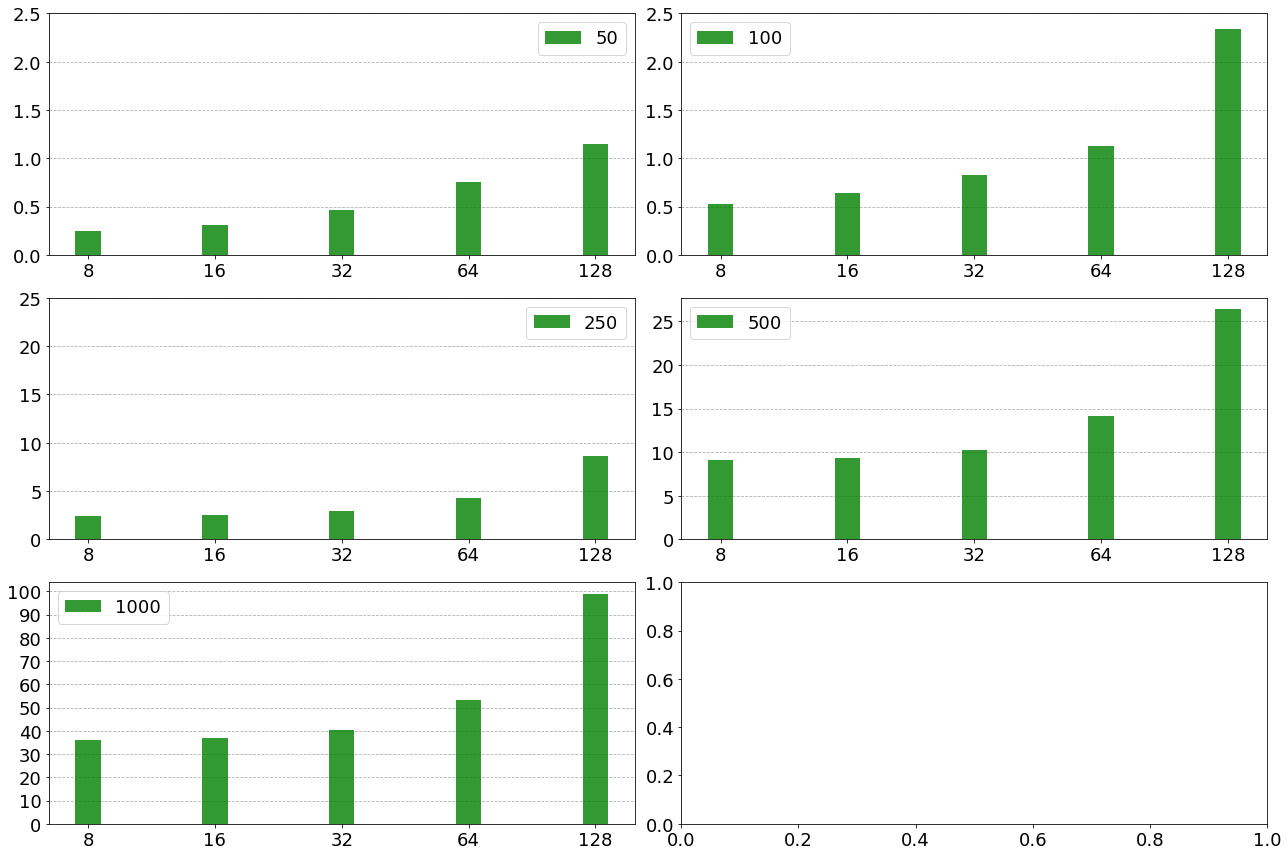

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

test = [50, 100, 250, 500, 1000]

n_threads = [8, 16, 32, 64, 128]

dtwParallel_norm2 = []

for t in range(len(test)):
    
    for n in range(len(n_threads)):
        data = np.loadtxt("./Results_with_differents_Number_of_MTS/dtwParallel_"+str(test[t])+"MTS_norm2_"+str(n_threads[n])+"threads.txt", dtype=str)
        a = [word.rstrip(",[]") for word in data]
        a[0] = a[0][1:]
        a = [float(i) for i in a]
        dtwParallel_norm2.append(np.mean(a))
        
fig, ax = plt.subplots(3,2,figsize=(18,12))

index_inf = 0
index_sup = 5
count = 0

for c in range(3):
    for r in range(2):

        ax[c,r].bar(np.arange(len(dtwParallel_norm2[index_inf:index_sup])), dtwParallel_norm2[index_inf:index_sup], color='green', width=0.2, alpha=0.8, label=test[count])

        keys_finales = ["8", "16", "32", "64", "128"]
        ax[c,r].set_xticks(np.arange(len(dtwParallel_norm2[index_inf:index_sup])), keys_finales, fontsize=18)
        
        if c == 0:
            keys_finales_2 = np.arange(0,3,0.5)
            ax[c,r].set_yticks(keys_finales_2, fontsize=18)
            
        elif c == 1:
            keys_finales_2 = np.arange(0,30,5)
            ax[c,r].set_yticks(keys_finales_2, fontsize=18)
        else:
            keys_finales_2 = np.arange(0,110,10)
            ax[c,r].set_yticks(keys_finales_2, fontsize=18)

        #ax[c,r].set_ylabel('computation time [seconds]',fontsize=18) 
        ax[c,r].yaxis.grid(linestyle = 'dashed')  # grid lines
        ax[c,r].set_axisbelow(True)  # grid lines are behind the rest
        

        import matplotlib 
        matplotlib.rc('xtick', labelsize=18) 
        matplotlib.rc('ytick', labelsize=18) 
        

        ax[c,r].legend([str(test[count])], fontsize=18)
        
        index_inf = index_sup
        index_sup += 5
        count+=1
        
        if index_sup > 25:
            break

plt.tight_layout()

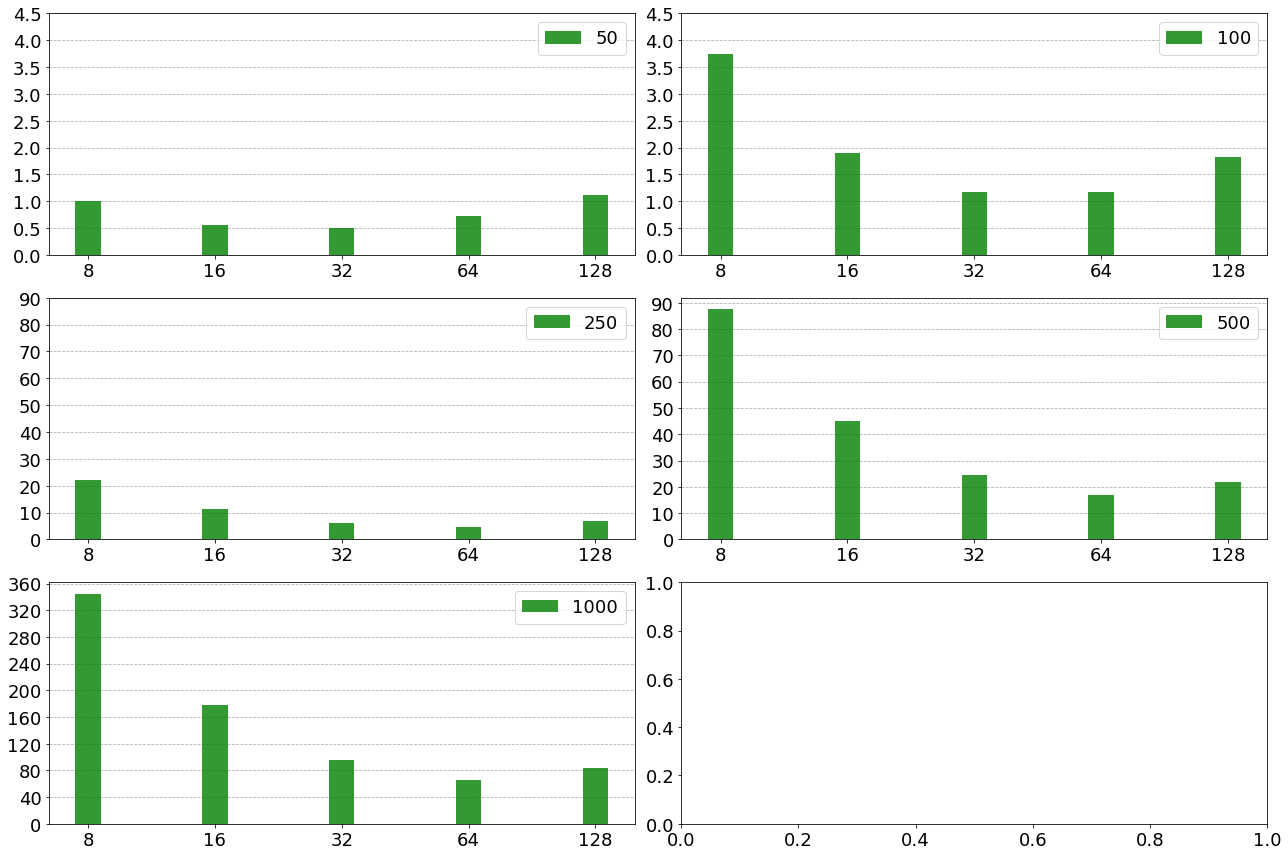

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


test = [50, 100, 250, 500, 1000]

n_threads = [8, 16, 32, 64, 128]

dtwParallel_norm2 = []

for t in range(len(test)):
    
    for n in range(len(n_threads)):
        data = np.loadtxt("./Results_with_differents_Number_of_MTS/dtwParallel_"+str(test[t])+"MTS_euclideanfunction_"+str(n_threads[n])+"threads.txt", dtype=str)
        a = [word.rstrip(",[]") for word in data]
        a[0] = a[0][1:]
        a = [float(i) for i in a]
        dtwParallel_norm2.append(np.mean(a))
        
fig, ax = plt.subplots(3,2,figsize=(18,12))

index_inf = 0
index_sup = 5
count = 0

for c in range(3):
    for r in range(2):

        ax[c,r].bar(np.arange(len(dtwParallel_norm2[index_inf:index_sup])), dtwParallel_norm2[index_inf:index_sup], color='green', width=0.2, alpha=0.8, label=test[count])

        keys_finales = ["8", "16", "32", "64", "128"]
        ax[c,r].set_xticks(np.arange(len(dtwParallel_norm2[index_inf:index_sup])), keys_finales, fontsize=18)
        
        if c == 0:
            keys_finales_2 = np.arange(0,5,0.5)
            ax[c,r].set_yticks(keys_finales_2, fontsize=18)
            
        elif c == 1:
            keys_finales_2 = np.arange(0,100,10)
            ax[c,r].set_yticks(keys_finales_2, fontsize=18)
        else:
            keys_finales_2 = np.arange(0,400,40)
            ax[c,r].set_yticks(keys_finales_2, fontsize=18)

        #ax[c,r].set_ylabel('computation time [seconds]',fontsize=18) 
        ax[c,r].yaxis.grid(linestyle = 'dashed')  # grid lines
        ax[c,r].set_axisbelow(True)  # grid lines are behind the rest
        

        import matplotlib 
        matplotlib.rc('xtick', labelsize=18) 
        matplotlib.rc('ytick', labelsize=18) 
        

        ax[c,r].legend([str(test[count])], fontsize=18)
        
        index_inf = index_sup
        index_sup += 5
        count+=1
        
        if index_sup > 25:
            break

plt.tight_layout()